In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [107]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from scipy.stats import expon

In [18]:
k10 = KFold(n_splits=10, random_state=123, shuffle=True)

In [11]:
#train = pd.read_csv('datasets/solubility/solTrainX.csv', index_col=0)
train = pd.read_csv('datasets/solubility/solTrainXtrans.csv', index_col=0)
test = pd.read_csv('datasets/solubility/solTestXtrans.csv', index_col=0)
y_train = pd.read_csv('datasets/solubility/solTrainY.csv', index_col=0)
y_test = pd.read_csv('datasets/solubility/solTrainY.csv', index_col=0)

In [12]:
train.shape, test.shape, y_train.shape, y_test.shape

((951, 228), (316, 228), (951, 1), (951, 1))

In [13]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
FP001,951.0,0.493165,0.500216,0.000000,0.000000,0.000000,1.000000,1.000000
FP002,951.0,0.539432,0.498705,0.000000,0.000000,1.000000,1.000000,1.000000
FP003,951.0,0.436383,0.496197,0.000000,0.000000,0.000000,1.000000,1.000000
FP004,951.0,0.584648,0.493042,0.000000,0.000000,1.000000,1.000000,1.000000
FP005,951.0,0.579390,0.493917,0.000000,0.000000,1.000000,1.000000,1.000000
FP006,951.0,0.400631,0.490284,0.000000,0.000000,0.000000,1.000000,1.000000
FP007,951.0,0.363828,0.481353,0.000000,0.000000,0.000000,1.000000,1.000000
FP008,951.0,0.325973,0.468984,0.000000,0.000000,0.000000,1.000000,1.000000
FP009,951.0,0.279706,0.449091,0.000000,0.000000,0.000000,1.000000,1.000000
FP010,951.0,0.178759,0.383352,0.000000,0.000000,0.000000,0.000000,1.000000


In [6]:
fp_cols = train.columns[train.columns.str.startswith('FP')]
num_cols = train.columns ^ fp_cols

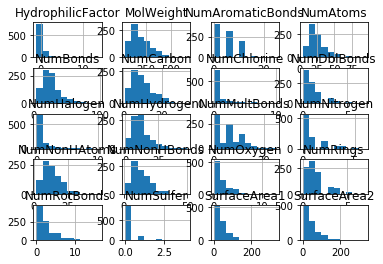

In [9]:
_ = train[num_cols].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9393317e80>]], dtype=object)

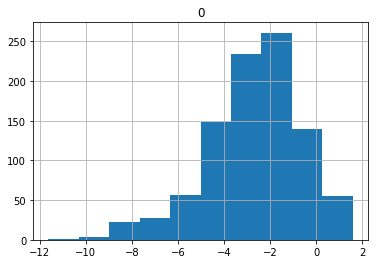

In [16]:
y_train.hist()

### Neural Network

In [52]:
neural_pipe = make_pipeline(StandardScaler(), MLPRegressor(max_iter=1000, solver='sgd'))
params = {'mlpregressor__hidden_layer_sizes': [(i,) for i in range(1, 13)],
          'mlpregressor__alpha': [0, .01, .1]}

neural_grid = GridSearchCV(neural_pipe, params, cv=k10, scoring='neg_mean_squared_error', 
                           n_jobs=-1, verbose=1, return_train_score=True)

In [53]:
neural_grid.fit(train, y_train.values.ravel())

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  6.1min finished


GridSearchCV(cv=KFold(n_splits=10, random_state=123, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlpregressor', MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
   ...e=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'mlpregressor__alpha': [0, 0.01, 0.1], 'mlpregressor__hidden_layer_sizes': [(1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,), (9,), (10,), (11,), (12,)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=1)

In [54]:
neural_grid.best_params_, neural_grid.best_score_

({'mlpregressor__alpha': 0, 'mlpregressor__hidden_layer_sizes': (5,)},
 -0.4880519391879104)

Text(0,0.5,'RMSE')

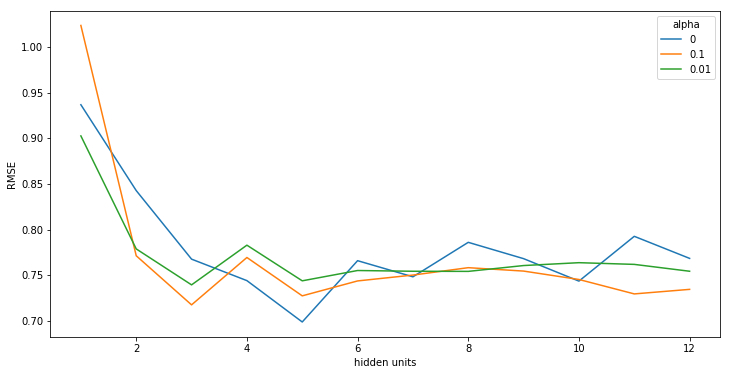

In [55]:
alphas = np.array(neural_grid.cv_results_['param_mlpregressor__alpha'], dtype=float)
hiddens = np.array([a[0] for a in neural_grid.cv_results_['param_mlpregressor__hidden_layer_sizes']])

rmse = np.sqrt(-neural_grid.cv_results_['mean_test_score'])

r0 = rmse[alphas==0]
r01 = rmse[alphas==0.1]
r001 = rmse[alphas==0.01]


xs = hiddens[:12]
plt.figure(figsize=(12, 6))
plt.plot(xs, r0, label='0')
plt.plot(xs, r01, label='0.1')
plt.plot(xs, r001, label='0.01')
plt.legend(title='alpha')
plt.xlabel('hidden units')
plt.ylabel('RMSE')


### Support Vector Machines

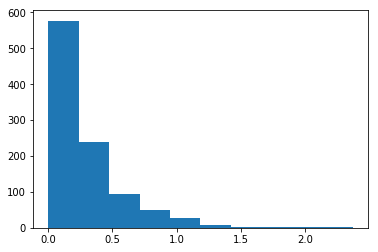

In [59]:
a = expon(0, .3)
_ = plt.hist(a.rvs(1000))

In [61]:
svr_pipe = make_pipeline(StandardScaler(), SVR(kernel='rbf'))
svr_grid = GridSearchCV(svr_pipe, {"svr__C": 2**np.arange(-2, 11, dtype=float)}, 
                        cv=k10, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

In [62]:
svr_grid.fit(train, y_train.values.ravel())

Fitting 10 folds for each of 13 candidates, totalling 130 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:   33.5s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=123, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svr', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'svr__C': array([  2.50000e-01,   5.00000e-01,   1.00000e+00,   2.00000e+00,
         4.00000e+00,   8.00000e+00,   1.60000e+01,   3.20000e+01,
         6.40000e+01,   1.28000e+02,   2.56000e+02,   5.12000e+02,
         1.02400e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [64]:
svr_grid.best_params_, np.sqrt(-svr_grid.best_score_)

({'svr__C': 256.0}, 0.63081284903283052)

In [116]:
svr_best = svr_grid.best_estimator_.steps[-1][-1]

In [121]:
svr_best.support_vectors_.shape[0]

774

(0.6, 1)

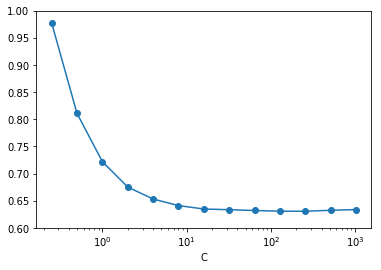

In [71]:
C = np.array(svr_grid.cv_results_['param_svr__C'])
scores = np.sqrt(-svr_grid.cv_results_['mean_test_score'])

plt.plot(C, scores, 'o-')
plt.semilogx(2)
plt.xlabel('C')
plt.ylim(0.6, 1)

In [83]:
poly_param = {'svr__degree': [1, 2], 'svr__C': 2**np.arange(-2, 6, dtype=float), 'svr__gamma': [.001, .005, .01]}
svr_poly = GridSearchCV(make_pipeline(StandardScaler(), SVR(kernel='poly')), poly_param, 
                        cv=k10, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')

In [84]:
svr_poly.fit(train, y_train.values.ravel())

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  2.2min finished


GridSearchCV(cv=KFold(n_splits=10, random_state=123, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svr', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'svr__C': array([  0.25,   0.5 ,   1.  ,   2.  ,   4.  ,   8.  ,  16.  ,  32.  ]), 'svr__gamma': [0.001, 0.005, 0.01], 'svr__degree': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [85]:
svr_poly.best_params_, np.sqrt(-svr_poly.best_score_)

({'svr__C': 16.0, 'svr__degree': 1, 'svr__gamma': 0.001}, 0.69373959239498451)

In [87]:
gamma = np.array(svr_poly.cv_results_['param_svr__gamma'], dtype=float)
gamma001 = gamma==0.001
gamma005 = gamma==0.005
gamma01 = gamma==0.01

In [89]:
C = np.array(svr_poly.cv_results_['param_svr__C'], dtype=float)
C

array([  0.25,   0.25,   0.25,   0.25,   0.25,   0.25,   0.5 ,   0.5 ,
         0.5 ,   0.5 ,   0.5 ,   0.5 ,   1.  ,   1.  ,   1.  ,   1.  ,
         1.  ,   1.  ,   2.  ,   2.  ,   2.  ,   2.  ,   2.  ,   2.  ,
         4.  ,   4.  ,   4.  ,   4.  ,   4.  ,   4.  ,   8.  ,   8.  ,
         8.  ,   8.  ,   8.  ,   8.  ,  16.  ,  16.  ,  16.  ,  16.  ,
        16.  ,  16.  ,  32.  ,  32.  ,  32.  ,  32.  ,  32.  ,  32.  ])

In [90]:
deg = np.array(svr_poly.cv_results_['param_svr__degree'], dtype=int)
deg1 = deg==1
deg2 = deg==2

In [93]:
scores = np.sqrt(-svr_poly.cv_results_['mean_test_score'])

(0.6, 2)

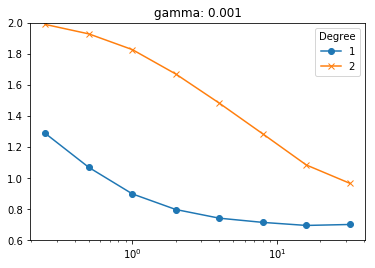

In [104]:
plt.plot(C[gamma001&deg1], scores[gamma001 & deg1], 'o-', label='1')
plt.plot(C[gamma001&deg2], scores[gamma001 & deg2], 'x-', label='2')

plt.legend(title='Degree')
plt.title('gamma: 0.001')
plt.semilogx(2)
plt.ylim(0.6, 2)

(0.6, 2)

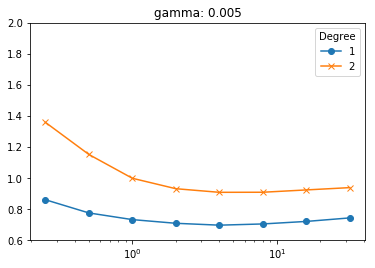

In [105]:
plt.plot(C[gamma005&deg1], scores[gamma005 & deg1], 'o-', label='1')
plt.plot(C[gamma005&deg2], scores[gamma005 & deg2], 'x-', label='2')

plt.legend(title='Degree')
plt.title('gamma: 0.005')
plt.semilogx(2)
plt.ylim(0.6, 2)

(0.6, 2)

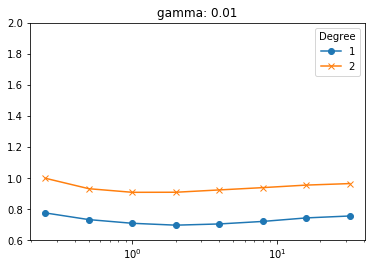

In [106]:
plt.plot(C[gamma01&deg1], scores[gamma01 & deg1], 'o-', label='1')
plt.plot(C[gamma01&deg2], scores[gamma01 & deg2], 'x-', label='2')

plt.legend(title='Degree')
plt.title('gamma: 0.01')
plt.semilogx(2)
plt.ylim(0.6, 2)

### K-Nearest Neighbors

In [108]:
knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor(weights='distance'))
knn_grid = GridSearchCV(knn_pipe, {'kneighborsregressor__n_neighbors': np.arange(2, 21)}, 
                        cv=k10, scoring='neg_mean_squared_error', verbose=1)

In [109]:
knn_grid.fit(train, y_train.values.ravel())

Fitting 10 folds for each of 19 candidates, totalling 190 fits


[Parallel(n_jobs=1)]: Done 190 out of 190 | elapsed:  1.4min finished


GridSearchCV(cv=KFold(n_splits=10, random_state=123, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kneighborsregressor', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='distance'))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kneighborsregressor__n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [110]:
knn_grid.best_params_, np.sqrt(-knn_grid.best_score_)

({'kneighborsregressor__n_neighbors': 8}, 0.9903728374283729)

Text(0.5,1,'KNN')

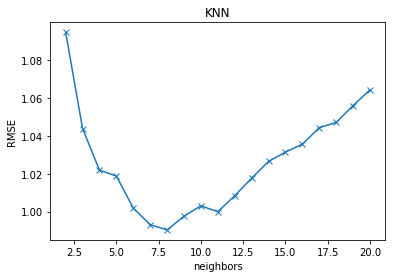

In [111]:
scores = np.sqrt(-knn_grid.cv_results_['mean_test_score'])
k = np.array(knn_grid.cv_results_['param_kneighborsregressor__n_neighbors'], dtype=int)

plt.plot(k, scores, 'x-')
plt.xlabel('neighbors')
plt.ylabel('RMSE')
plt.title('KNN')